### Importing the necessary Libraries

In [ ]:
import os
import shutil
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

### Making Directories for Training,Validation and Testing Data 

In [ ]:
org1_ds_dir = 'drive/MyDrive/Helmet detection/dataset/Helmet'
org2_ds_dir = 'drive/MyDrive/Helmet detection/dataset/NoHelmet'

base_dir = 'drive/MyDrive/Helmet detection/Helmet detection_1'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
v_dir = os.path.join(base_dir, 'valid')
os.mkdir(v_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_m_dir = os.path.join(train_dir, 'helmet_1')
os.mkdir(train_m_dir)

train_wm_dir = os.path.join(train_dir, 'no_helmet_1')
os.mkdir(train_wm_dir)

v_m_dir = os.path.join(v_dir, 'helmet_1')
os.mkdir(v_m_dir)

v_wm_dir = os.path.join(v_dir, 'no_helmet_1')
os.mkdir(v_wm_dir)

test_m_dir = os.path.join(test_dir, 'helmet_1')
os.mkdir(test_m_dir)

test_wm_dir = os.path.join(test_dir, 'no_helmet_1')
os.mkdir(test_wm_dir)

### Moving images from the original dataset to the directories created above

In [ ]:
fnames = ['H({}).jpg'.format(i) for i in range(1, 408)]
for fname in fnames:
    src = os.path.join(org1_ds_dir, fname)
    dst = os.path.join(train_m_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['H({}).jpg'.format(i) for i in range(408, 567)]
for fname in fnames:
    src = os.path.join(org1_ds_dir, fname)
    dst = os.path.join(v_m_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['H({}).jpg'.format(i) for i in range(567, 710)]
for fname in fnames:
    src = os.path.join(org1_ds_dir, fname)
    dst = os.path.join(test_m_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['NH({}).jpg'.format(i) for i in range(1, 410)]
for fname in fnames:
    src = os.path.join(org2_ds_dir, fname)
    dst = os.path.join(train_wm_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['NH({}).jpg'.format(i) for i in range(410, 548)]
for fname in fnames:
    src = os.path.join(org2_ds_dir, fname)
    dst = os.path.join(v_wm_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['NH({}).jpg'.format(i) for i in range(548, 686)]
for fname in fnames:
    src = os.path.join(org2_ds_dir, fname)
    dst = os.path.join(test_wm_dir, fname)
    shutil.copyfile(src, dst)

### Configuring the CNN Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.MaxPooling2D(2, 2))
# model.add(layers.Conv2D(128, (3, 3)))
# model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Compiling the CNN Model

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

### Rescaling the Images to target size of (150,150), and rotating and flipping some images for achieving variation in the dataset

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=2,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    v_dir,
    target_size=(150, 150),
    batch_size=2,
    class_mode='binary')

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    v_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='binary')

Found 816 images belonging to 2 classes.
Found 297 images belonging to 2 classes.
Found 816 images belonging to 2 classes.
Found 297 images belonging to 2 classes.


### Training The CNN Model

In [ ]:
filepath= "drive/MyDrive/" +"val1_h" + "-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=8,
    validation_data=validation_generator,
    validation_steps=30,callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
10/10 [==============================] - 11s 1s/step - loss: 0.1667 - acc: 0.9375 - val_loss: 0.2361 - val_acc: 0.8917

Epoch 00001: val_acc improved from -inf to 0.89167, saving model to drive/MyDrive/val1_h-01-0.8917.hdf5
Epoch 2/8
10/10 [==============================] - 11s 1s/step - loss: 0.1829 - acc: 0.9125 - val_loss: 0.2127 - val_acc: 0.9083

Epoch 00002: val_acc improved from 0.89167 to 0.90833, saving model to drive/MyDrive/val1_h-02-0.9083.hdf5
Epoch 3/8
10/10 [==============================] - 10s 1s/step - loss: 0.2943 - acc: 0.9000 - val_loss: 0.2506 - val_acc: 0.8917

Epoch 00003: val_acc did not improve from 0.90833
Epoch 4/8
10/10 [==============================] - 10s 1s/step - loss: 0.2018 - acc: 0.9000 - val_loss: 0.2095 - val_acc: 0.9125

Epoch 00004: val_acc improved from 0.90833 to 0.91250, saving model to drive/MyDrive/val1_h-04-0.9125.hdf5
Epoch 5/8
10/10 [==============================] - 11s 1s/step - loss: 0.2229 - acc: 0.9000 - val_loss: 0.2288 -

### Saving the weight file of the trained Model

In [ ]:
model.save('Helmet_Detection_md.h5')

### Plotting the validation accuracy and loss along with training accuracy and loss

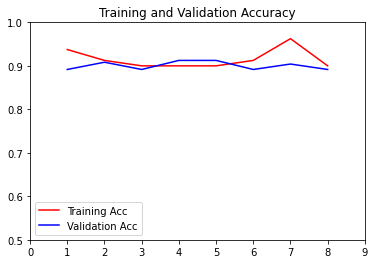

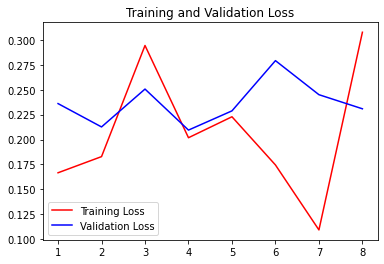

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.xlim(0, len(acc)+1)
plt.ylim(0.5,1)
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Testing the model on the Test data, and finding accuracy of the model

In [ ]:
test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=3,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print('test_acc:', test_acc*100,'%')

Found 281 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test_acc: 93.33333373069763 %


### Loading the Trained Model

In [ ]:
from keras.models import load_model
model = load_model('Helmet_Detection_md.h5')
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

### Printing the classes of the Trained Model

In [ ]:
classes = train_generator.class_indices
print(classes)

{'helmet_1': 0, 'no_helmet_1': 1}


### Testing the model on various images

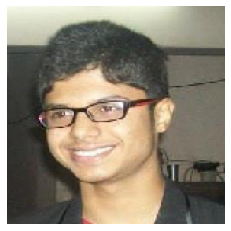

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

img = image.load_img('drive/MyDrive/Helmet detection/dataset/NoHelmet/NH(427).jpg', target_size=(150,150))
imt = image.img_to_array(img)
imt = np.expand_dims(imt, axis=0)
imt /= 255.

plt.imshow(imt[0])
plt.axis('off')
plt.show()

In [ ]:
pred1 = model.predict_classes(imt)
print(pred1)
if (pred1==0):
  print("Helmet is on")
else:
  print("No Helmet")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[1]]
No Helmet


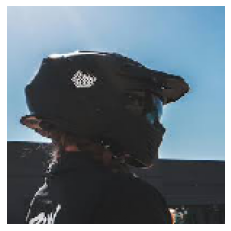

In [ ]:
import matplotlib.pyplot as plt

img = image.load_img('drive/MyDrive/Helmet detection/dataset/Helmet/H(427).jpg', target_size=(150,150))
imt = image.img_to_array(img)
imt = np.expand_dims(imt, axis=0)
imt /= 255.

plt.imshow(imt[0])
plt.axis('off')
plt.show()

In [ ]:
pred1 = model.predict_classes(imt)
if (pred1==0):
  print("Helmet is on")
else:
  print("No Helmet")

Helmet is on


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


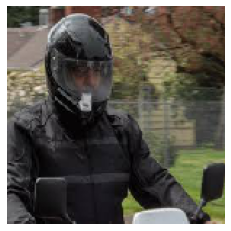

In [ ]:
import matplotlib.pyplot as plt

img = image.load_img('drive/MyDrive/Helmet detection/dataset/Helmet/H(234).jpg', target_size=(150,150))
imt = image.img_to_array(img)
imt = np.expand_dims(imt, axis=0)
imt /= 255.

plt.imshow(imt[0])
plt.axis('off')
plt.show()

In [ ]:
pred1 = model.predict_classes(imt)
if (pred1==0):
  print("Helmet is on")
else:
  print("No Helmet")

Helmet is on


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


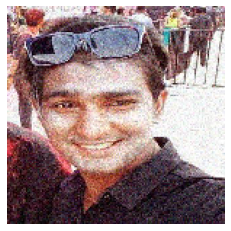

In [ ]:
import matplotlib.pyplot as plt

img = image.load_img('drive/MyDrive/Helmet detection/dataset/NoHelmet/NH(680).jpg', target_size=(150,150))
imt = image.img_to_array(img)
imt = np.expand_dims(imt, axis=0)
imt /= 255.

plt.imshow(imt[0])
plt.axis('off')
plt.show()

In [ ]:
pred1 = model.predict_classes(imt)
if (pred1==0):
  print("Helmet is on")
else:
  print("No Helmet")

No Helmet


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


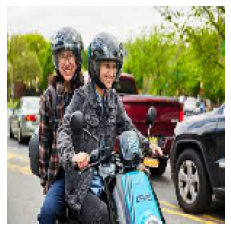

In [ ]:
import matplotlib.pyplot as plt

img = image.load_img('drive/MyDrive/Helmet detection/dataset/Helmet/H(680).jpg', target_size=(150,150))
imt = image.img_to_array(img)
imt = np.expand_dims(imt, axis=0)
imt /= 255.

plt.imshow(imt[0])
plt.axis('off')
plt.show()

In [ ]:
pred1 = model.predict_classes(imt)
if (pred1==0):
  print("Helmet is on")
else:
  print("No Helmet")

Helmet is on


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


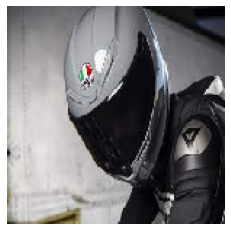

In [ ]:
import matplotlib.pyplot as plt

img = image.load_img('drive/MyDrive/Helmet detection/dataset/Helmet/H(328).jpg', target_size=(150,150))
imt = image.img_to_array(img)
imt = np.expand_dims(imt, axis=0)
imt /= 255.

plt.imshow(imt[0])
plt.axis('off')
plt.show()

In [ ]:
pred1 = model.predict_classes(imt)
if (pred1==0):
  print("Helmet is on")
else:
  print("No Helmet")

Helmet is on


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


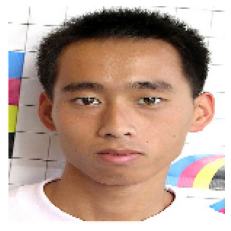

In [ ]:
img = image.load_img('drive/MyDrive/Helmet detection/dataset/NoHelmet/NH(221).jpg', target_size=(150,150))
imt = image.img_to_array(img)
imt = np.expand_dims(imt, axis=0)
imt /= 255.

plt.imshow(imt[0])
plt.axis('off')
plt.show()

In [ ]:
pred1 = model.predict_classes(imt)
if (pred1==0):
  print("Helmet is on")
else:
  print("No Helmet")

No Helmet


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


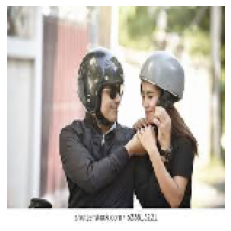

In [ ]:
import matplotlib.pyplot as plt

img = image.load_img('drive/MyDrive/Helmet detection/dataset/Helmet/H(565).jpg', target_size=(150,150))
imt = image.img_to_array(img)
imt = np.expand_dims(imt, axis=0)
imt /= 255.

plt.imshow(imt[0])
plt.axis('off')
plt.show()

In [ ]:
pred1 = model.predict_classes(imt)
if (pred1==0):
  print("Helmet is on")
else:
  print("No Helmet")

Helmet is on


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


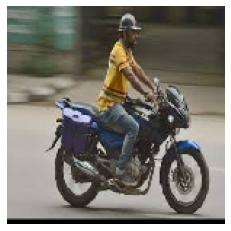

In [ ]:
img = image.load_img('drive/MyDrive/Helmet detection/dataset/Helmet/H(235).jpg', target_size=(150,150))
imt = image.img_to_array(img)
imt = np.expand_dims(imt, axis=0)
imt /= 255.

plt.imshow(imt[0])
plt.axis('off')
plt.show()

In [ ]:
pred1 = model.predict_classes(imt)
if (pred1==0):
  print("Helmet is on")
else:
  print("No Helmet")

Helmet is on


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


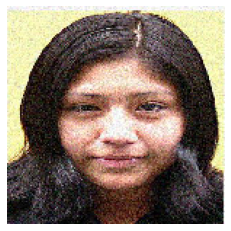

In [ ]:
img = image.load_img('drive/MyDrive/Helmet detection/dataset/NoHelmet/NH(520).jpg', target_size=(150,150))
imt = image.img_to_array(img)
imt = np.expand_dims(imt, axis=0)
imt /= 255.

plt.imshow(imt[0])
plt.axis('off')
plt.show()

In [ ]:
pred1 = model.predict_classes(imt)
if (pred1==0):
  print("Helmet is on")
else:
  print("No Helmet")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


No Helmet
